In [ ]:
pip install requests matplotlib

In [ ]:
import requests
import time
import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

# 🔹 GitHub API Configuration
GITHUB_API_URL = "https://api.github.com"
REPO_OWNER = "eclipse-platform"
REPO_NAME = "eclipse.platform.ui"  # Change to the Eclipse repository name
GITHUB_TOKEN = "ADD_GITHUB_TOKEN_HERE";  # Optional, for higher rate limits

# 🔹 Headers for Authentication (Higher Rate Limits)
HEADERS = {"Authorization": f"token {GITHUB_TOKEN}"} if GITHUB_TOKEN else {}

def fetch_issues_count(owner, repo, date_filter):
    """Fetch the count of issues based on state (open/closed) and a date filter."""
    url = f"{GITHUB_API_URL}/search/issues?q=repo:{owner}/{repo}+is:issue+{date_filter}"

    try:
        print(f"Sending request: {url}")  # Debugging print
        response = requests.get(url, headers=HEADERS)
        print(f"Response status code: {response.status_code}")  # Debugging print
        response.raise_for_status()
        data = response.json()
        total_count = data.get("total_count", 0)
        print(f"Total issues returned: {total_count}")  # Debugging print
        return total_count

    except requests.exceptions.RequestException as e:
        print(f"⚠️ Error fetching issues for {date_filter}: {e}")
        return 0

def calculate_monthly_resolution_rate(owner, repo, months=12):
    """Calculate the issue resolution rate per month for the last `months` months."""
    today = datetime.date.today()
    resolution_rates = {}

    for i in range(1, months):
        start_date = (today - datetime.timedelta(days=30 * i)).replace(day=1)
        end_date = (start_date + datetime.timedelta(days=32)).replace(day=1) - datetime.timedelta(days=1)

        created_filter = f"created:{start_date}..{end_date}"
        closed_filter = created_filter + f"+closed:{start_date}..{end_date}"

        issues_created = fetch_issues_count(owner, repo, created_filter)
        issues_closed = fetch_issues_count(owner, repo, closed_filter)

        resolution_rate = (issues_closed / issues_created * 100) if issues_created > 0 else 0
        resolution_rates[start_date.strftime("%Y-%m")] = resolution_rate

        print(f"📊 {start_date.strftime('%Y-%m')}: {resolution_rate:.2f}% ({issues_closed}/{issues_created} resolved)")

        time.sleep(5)  # Avoid hitting GitHub API rate limits

    return resolution_rates

def plot_resolution_rate(resolution_rates):
    """Plot the issue resolution rate trend."""
    months = list(resolution_rates.keys())[::-1]
    rates = list(resolution_rates.values())[::-1]

    plt.figure(figsize=(10, 5))
    plt.plot(months, rates, marker="o", linestyle="-", color="b", label="Resolution Rate (%)")
    plt.xlabel("Month")
    plt.ylabel("Resolution Rate (%)")
    plt.title("Monthly Issue Resolution Rate")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# 🔹 Run and plot resolution trends
resolution_rates = calculate_monthly_resolution_rate(REPO_OWNER, REPO_NAME, months=24)

Sending request: https://api.github.com/search/issues?q=repo:eclipse-platform/eclipse.platform.ui+is:issue+created:2025-01-01..2025-01-31
Response status code: 200
Total issues returned: 34
Sending request: https://api.github.com/search/issues?q=repo:eclipse-platform/eclipse.platform.ui+is:issue+created:2025-01-01..2025-01-31+closed:2025-01-01..2025-01-31
Response status code: 200
Total issues returned: 14
📊 2025-01: 41.18% (14/34 resolved)
Sending request: https://api.github.com/search/issues?q=repo:eclipse-platform/eclipse.platform.ui+is:issue+created:2024-12-01..2024-12-31
Response status code: 200
Total issues returned: 28
Sending request: https://api.github.com/search/issues?q=repo:eclipse-platform/eclipse.platform.ui+is:issue+created:2024-12-01..2024-12-31+closed:2024-12-01..2024-12-31
Response status code: 200
Total issues returned: 10
📊 2024-12: 35.71% (10/28 resolved)
Sending request: https://api.github.com/search/issues?q=repo:eclipse-platform/eclipse.platform.ui+is:issue+cre

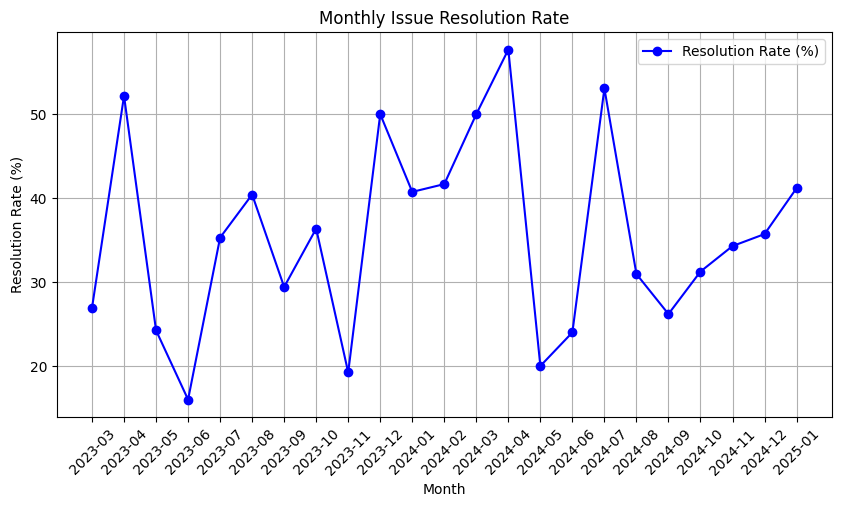

In [ ]:
plot_resolution_rate(resolution_rates)